# Naive bayes
> Using naive_bayes to detect is Email is Spam or not.


- toc: true 
- badges: true
- comments: true
- categories: [jupyter, Classification]

## 0. Data preprocessing

### 0.1 Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 0.2 Import dataset

In [2]:
email = pd.read_csv('emails.csv')
email

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
len(email)

5728

### 0.3 Check if any null value

In [5]:
email.isna().sum()

text    0
spam    0
dtype: int64

In [6]:
email.shape

(5728, 2)

In [7]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


### 0.4 Cleaning the text

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(email)):
  e_mail = re.sub('[^a-zA-Z]', ' ', email['text'][i])
  e_mail = e_mail.split()
  ps = PorterStemmer()
  e_mail = [ps.stem(word) for word in e_mail if not word in set(stopwords.words('english'))]
  e_mail = ' '.join(e_mail)
  corpus.append(e_mail)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
corpus[2509]

'subject enron mid year perform manag process enron mid year perform manag process begun process requir select suggest review provid perform relat feedback may also request provid feedback fellow employe need access perform manag system pep http pep enron com question direct pep help desk follow number u option europ option canada canada employe e mail question perfmgmt enron com log pep enter user id password provid log immedi prompt chang secur password user id password user id wkamin password welcom'

### 0.5 Creating the Bag of Words model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = email['spam']

In [11]:
len(X)

5728

In [12]:
X.shape

(5728, 25607)

In [13]:
len(y)

5728

### 0.6 Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2509)

## 1. Training the Naive Bayes model on the Training set

### 1.1.1 GaussianNB

In [15]:
from sklearn.naive_bayes import GaussianNB
GN_classifier = GaussianNB()
GN_classifier.fit(X_train, y_train)

GaussianNB()

### 1.1.2 Score

In [16]:
GN_score = GN_classifier.score(X_test,y_test)
GN_score

0.9528795811518325

In [17]:
y_GN_pred = GN_classifier.predict(X_test) #Predicting the Test set results

### 1.2.1 MultinomialNB

In [18]:
from sklearn.naive_bayes import MultinomialNB
MN_classifier = MultinomialNB()
MN_classifier.fit(X_train, y_train)

MultinomialNB()

### 1.2.2 Score

In [19]:
MN_score = MN_classifier.score(X_test,y_test)
MN_score

0.9842931937172775

In [20]:
y_MN_pred = MN_classifier.predict(X_test) #Predicting the Test set results

## 2. Making the Confusion Matrix

### 2.1 GaussianNB

In [21]:
from sklearn.metrics import confusion_matrix
GN_cm = confusion_matrix(y_test, y_GN_pred)
print(GN_cm)

[[849  26]
 [ 28 243]]


### 2.2 MultinomialNB

In [22]:
from sklearn.metrics import confusion_matrix
MN_cm = confusion_matrix(y_test, y_MN_pred)
print(MN_cm)

[[862  13]
 [  5 266]]


## 3. Compare Both models

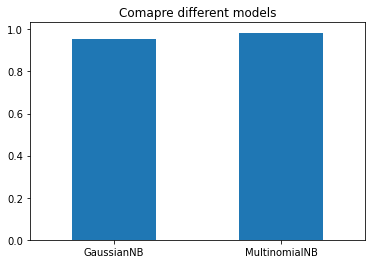

In [23]:
models = pd.DataFrame({"GaussianNB": GN_score,
                           "MultinomialNB": MN_score
                           },
                          index=[0])

models.T.plot.bar(title="Comapre different models",
                      legend=False)
plt.xticks(rotation=0);

## 4. SAVE MODEL

In [24]:
import pickle
pickle.dump(MN_classifier,open("Email_spam_naive_bayes_MN.pkl","wb"))